In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [51]:
data=pd.read_csv('Downloads/startup_funding.csv')
df=data.copy(deep=True)

In [15]:
#Taking rows that doesn't contains nan values
df= df[df['CityLocation'].notna()]
df.reset_index(inplace=True)

In [16]:
#replacing Name with uppercase
df['CityLocation'].replace("bangalore","Bangalore",inplace=True) 
df['CityLocation'].replace("delhi","New Delhi",inplace=True) 



In [17]:
#Taking Values which contains Specified Cities
for i in range(len(df['CityLocation'])):
    if 'Bangalore' in df['CityLocation'][i]:
        df['CityLocation'][i]='Bangalore'
    elif 'New Delhi' in df['CityLocation'][i]:
        df['CityLocation'][i]='New Delhi'
    elif 'Mumbai' in df['CityLocation'][i]:
        df['CityLocation'][i]='Mumbai'
    elif 'Gurgaon' in df['CityLocation'][i]:
        df['CityLocation'][i]='Gurgaon'
        

<ipython-input-17-796008ee5d61>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CityLocation'][i]='Bangalore'
<ipython-input-17-796008ee5d61>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CityLocation'][i]='New Delhi'
<ipython-input-17-796008ee5d61>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CityLocation'][i]='Mumbai'
<ipython-input-17-796008ee5d61>:10: SettingWithCopyWarning: 
A value is trying to be set on a cop

In [18]:
df=df.loc[(df['CityLocation']=='Bangalore')|(df['CityLocation']=='Mumbai')|
       (df['CityLocation']=='Gurgaon')|(df['CityLocation']=='Noida')|
       (df['CityLocation']=='New Delhi')]

In [19]:
ak=df.CityLocation.value_counts()
ak

Bangalore    637
Mumbai       449
New Delhi    385
Gurgaon      241
Noida         78
Name: CityLocation, dtype: int64

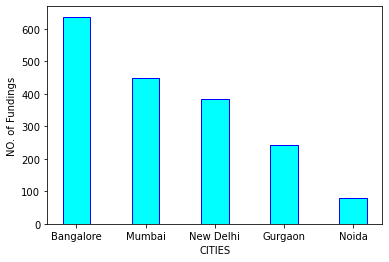

In [21]:
plt.bar(ak.index,ak.values,width = 0.4,color = "cyan" , edgecolor = "blue")
plt.xlabel('CITIES')
plt.ylabel('NO. of Fundings')
plt.show()

# Q2

In [24]:
df.InvestorsName

0                                             Kae Capital
1                              Triton Investment Advisors
2       Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...
3       Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...
4                          Narottam Thudi, Shireesh Palle
                              ...                        
2367                          Asia Pacific Internet Group
2368                                       KARSEMVEN Fund
2369                       Exfinity Fund, GrowX Ventures.
2370                                           MakeMyTrip
2371                    UK based Group of Angel Investors
Name: InvestorsName, Length: 2372, dtype: object

In [25]:
df = df[df['InvestorsName'].notna()]
df.reset_index(inplace=True)

In [26]:
def createdic(array):
    dict={}
    for i in array:
        if ',' not in i:
            if i in dict:
                dict[i]+=1
            else:
                dict[i]=1
        else:
            string=i.strip().split(',')
            for j in string:
                if j.strip() in dict:
                    dict[j.strip()]=dict.get(j.strip())+1
                else:
                    dict[j.strip()]=1
    return dict
dict=createdic(df.InvestorsName)

In [27]:
df1=pd.DataFrame(list(dict.values()),list(dict.keys()))

In [28]:
df2=df1.sort_values(by=[0],ascending=False)
X=df2.index[0:5]
Y=df2.values[0:5]
Y=Y.reshape(5)

In [29]:
for i in range(5):
    print(X[i],Y[i])

Sequoia Capital 64
Accel Partners 53
Kalaari Capital 44
SAIF Partners 41
Indian Angel Network 40


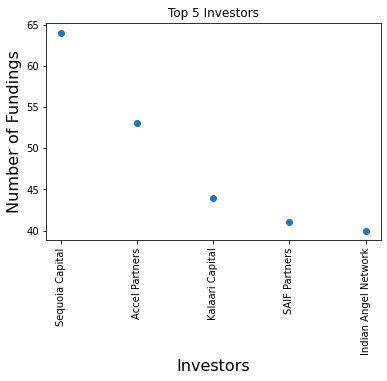

In [31]:
plt.scatter(X,Y)
plt.title('Top 5 Investors')
plt.xlabel("Investors", fontsize=16)  
plt.ylabel("Number of Fundings", fontsize=16)  
plt.xticks(rotation = 90)
plt.show()

# Q3

In [34]:
df.dropna(subset = ["StartupName","InvestorsName"],inplace = True) 

In [35]:
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
df['StartupName'].replace('Oyorooms','Oyo',inplace=True)
df['StartupName'].replace('OyoRooms','Oyo',inplace=True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)

In [36]:
dic = {}
for i in df.index:
    e = df["InvestorsName"][i].strip()
    if "," in e:
        for j in e.strip().split(','):
            if j.strip() in dic:
                dic[j.strip()].add(df["StartupName"][i].strip())
            else:
                s = set()
                dic[j.strip()] = s
                dic[j.strip()].add(df["StartupName"][i].strip())
    else:
        el = e.strip()
        if el in dic: 
            dic[el].add(df["StartupName"][i].strip())
        else:
            s = set()
            dic[el] = s
            dic[el].add(df["StartupName"][i].strip())

In [38]:
d1 = {}  
for i in dic:
    if i == "":
        continue
    d1[i] = len(dic[i])
d2 = sorted(d1, key=d1.get , reverse=True)[0:5]  
for i in d2:
    print(i , d1[i])
val = [] 
inv = []
for keys , values in d1.items() :
    for i in range(5):
        if keys == d2[i]:
            inv.append(keys)
            val.append(values)



Sequoia Capital 48
Accel Partners 47
Kalaari Capital 41
Indian Angel Network 40
Blume Ventures 36


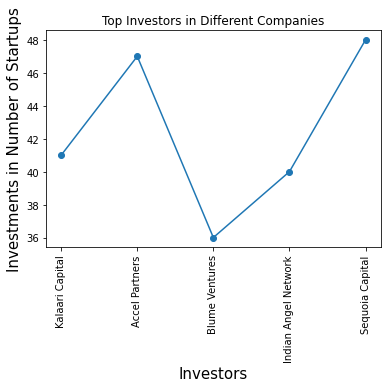

In [44]:
plt.plot(inv,val)
plt.scatter(inv , val)
plt.title('Top Investors in Different Companies')
plt.xlabel("Investors", fontsize=15)  
plt.ylabel("Investments in Number of Startups", fontsize=15)  
plt.xticks(rotation = 90) 
plt.show()

# Q4

In [46]:
df.dropna(subset = ["InvestorsName"],inplace = True) 

df["StartupName"].replace("Flipkart.com","Flipkart",inplace = True)  
df["StartupName"].replace("Ola Cabs","Ola",inplace = True)
df["StartupName"].replace("Olacabs","Ola",inplace = True)
df["StartupName"].replace("Oyorooms","Oyo",inplace = True)
df["StartupName"].replace("OyoRooms","Oyo",inplace = True)
df["StartupName"].replace("OYO Rooms","Oyo",inplace = True)
df["StartupName"].replace("Oyo Rooms","Oyo",inplace = True)
df["StartupName"].replace("Paytm Marketplace","Paytm",inplace = True)


df.InvestmentType.loc[df.InvestmentType == 'Crowd funding'] = 'Crowd Funding'
df.InvestmentType.loc[df.InvestmentType == 'PrivateEquity'] = 'Private Equity'
df.InvestmentType.loc[df.InvestmentType == 'SeedFunding'] = 'Seed Funding'

df["InvestorsName"].replace("Undisclosed Investors","",inplace = True) 
df["InvestorsName"].replace("Undisclosed investors","",inplace = True)


df = df[(df["InvestmentType"] == "Seed Funding") | (df["InvestmentType"] == "Crowd Funding")]  


dic = {}
for i in df.index:
    e = df["InvestorsName"][i].strip()
    if "," in e:
        for j in e.strip().split(','):
            if j.strip() in dic:
                dic[j.strip()].add(df["StartupName"][i].strip())
            else:
                s = set()
                dic[j.strip()] = s
                dic[j.strip()].add(df["StartupName"][i].strip())
    else:
        el = e.strip()
        if el in dic: 
            dic[el].add(df["StartupName"][i].strip())
        else:
            s = set()
            dic[el] = s
            dic[el].add(df["StartupName"][i].strip())

d1 = {}  
for i in dic:
    if i == "":
        continue
    d1[i] = len(dic[i])
     
d2 = sorted(d1, key=d1.get , reverse=True)[0:5]  
for i in d2:
    print(i , d1[i])

Indian Angel Network 33
Rajan Anandan 23
LetsVenture 16
Anupam Mittal 16
Kunal Shah 14


C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [47]:
val = [] 
inv = []
for keys , values in d1.items() :
    for i in range(5):
        if keys == d2[i]:
            inv.append(keys)
            val.append(values)


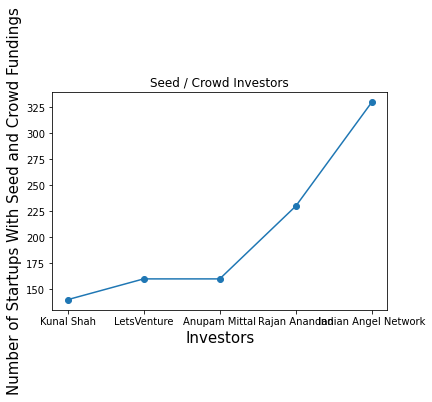

In [50]:

plt.scatter(inv , val)
plt.plot(inv,val)
plt.title('Seed / Crowd Investors')
plt.xlabel("Investors", fontsize=15)  
plt.ylabel("Number of Startups With Seed and Crowd Fundings", fontsize=15) 
plt.xticks(rotation = 0)
plt.show()

# Q5

In [52]:
df.dropna(subset = ["InvestorsName"],inplace = True) 

In [53]:
df["StartupName"].replace("Flipkart.com","Flipkart",inplace = True)  
df["StartupName"].replace("Ola Cabs","Ola",inplace = True)
df["StartupName"].replace("Olacabs","Ola",inplace = True)
df["StartupName"].replace("Oyorooms","Oyo",inplace = True)
df["StartupName"].replace("OyoRooms","Oyo",inplace = True)
df["StartupName"].replace("OYO Rooms","Oyo",inplace = True)
df["StartupName"].replace("Oyo Rooms","Oyo",inplace = True)
df["StartupName"].replace("Paytm Marketplace","Paytm",inplace = True)

df.InvestmentType.loc[df.InvestmentType == 'Crowd funding'] = 'Crowd Funding'
df.InvestmentType.loc[df.InvestmentType == 'PrivateEquity'] = 'Private Equity'
df.InvestmentType.loc[df.InvestmentType == 'SeedFunding'] = 'Seed Funding'

df["InvestorsName"].replace("Undisclosed Investors","",inplace = True) 
df["InvestorsName"].replace("Undisclosed investors","",inplace = True)


df = df[(df["InvestmentType"] == "Private Equity")]  

C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [54]:
dic = {}
for i in df.index:
    e = df["InvestorsName"][i].strip()
    if "," in e:
        for j in e.strip().split(','):
            if j.strip() in dic:
                dic[j.strip()].add(df["StartupName"][i].strip())
            else:
                s = set()
                dic[j.strip()] = s
                dic[j.strip()].add(df["StartupName"][i].strip())
    else:
        el = e.strip()
        if el in dic: 
            dic[el].add(df["StartupName"][i].strip())
        else:
            s = set()
            dic[el] = s
            dic[el].add(df["StartupName"][i].strip())\
            
d1 = {}  
for i in dic:
    if i == "":
        continue
    d1[i] = len(dic[i])
d2 = sorted(d1, key=d1.get , reverse=True)[0:5]  
for i in d2:
    print(i , d1[i])

     

Sequoia Capital 45
Accel Partners 43
Kalaari Capital 35
Blume Ventures 27
SAIF Partners 24


In [55]:
val = [] 
inv = []
for keys , values in d1.items() :
    for i in range(5):
        if keys == d2[i]:
            inv.append(keys)
            val.append(values)


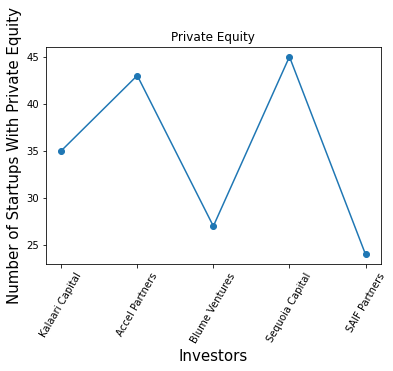

In [59]:
plt.scatter(inv , val)
plt.plot(inv,val)
plt.title('Private Equity')
plt.xlabel("Investors", fontsize=15)  
plt.ylabel("Number of Startups With Private Equity", fontsize=15) 
plt.xticks(rotation = 60)
plt.show()